In [1]:
from tf_unet import unet, util, image_util
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
#import scipy
from scipy import misc
%matplotlib inline

In [2]:
#####################
# Training data     # X & Y
#####################

Loading training dataset...



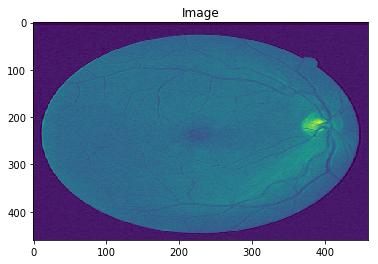

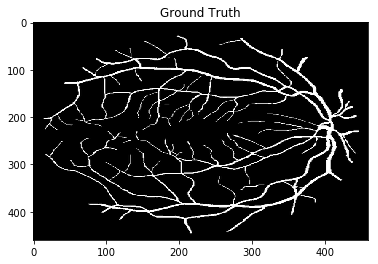

In [3]:
DATA_ROOT = "/Users/cesare.chung/int/01_CODE_UNET/NEW2/"
#
# Training
#
masks_dir = sorted(glob.glob(DATA_ROOT+"/trainData_tftf/resize2/*_manual1_resized_mask.gif"))
imgs_dir  = sorted(glob.glob(DATA_ROOT+"/trainData_tftf/resize2/*_training_resized_training.tif"))

# Import data
print('Loading training dataset...\n')

X_data=[]
for index,entry in enumerate(imgs_dir):
    img = misc.imread(entry)
    X_data.append(img)

Y_data=[]
for index,entry in enumerate(masks_dir):
    img = misc.imread(entry)
    Y_data.append(img)

#
X_data=np.array(X_data)
Y_data=np.array(Y_data)
#
plt.imshow(X_data[19,...,2], aspect="auto")   # X_data[i,...,j]. i = 1,..., number of samples; j = 1,2,3
plt.title("Image")
plt.show()
plt.imshow(Y_data[19,..., ], aspect="auto",cmap='gray')
plt.title("Ground Truth")
plt.show()

In [4]:
#####################
# Standardization   # X
#####################

In [5]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

X_data_std=[]
for i in range(0,20):
    img_std = stdsc.fit_transform(X_data[i,...,0])
    X_data_std.append(img_std)

#
X_data_std=np.array(X_data_std)
#

/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
print("TRAIN data  shape (Scaled):", X_data_std.shape)

print("TRAIN data  shape:", X_data.shape)
print("TRAIN label shape:", Y_data.shape)

TRAIN data  shape (Scaled): (20, 460, 460)
TRAIN data  shape: (20, 460, 460, 3)
TRAIN label shape: (20, 460, 460)


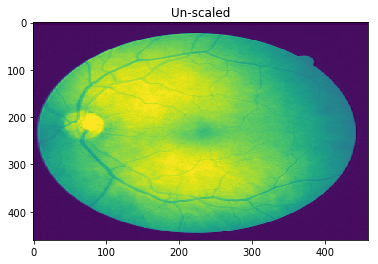

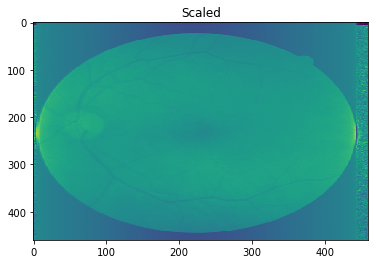

In [7]:
for i in range(14,15):
    plt.imshow(X_data[i,...,0], aspect="auto")
    plt.title("Un-scaled")
    plt.show()
    plt.imshow(X_data_std[i,...,], aspect="auto")
    plt.title("Scaled")
    plt.show()

In [8]:
#####################
# Testing  data     # X & Y
#####################

Loading testing dataset...



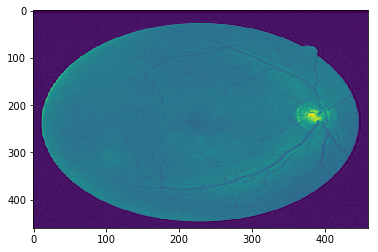

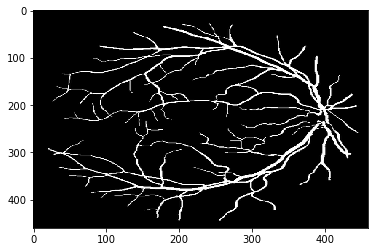

In [9]:
#
masks_Testing = sorted(glob.glob(DATA_ROOT+"/testData_tftf/resize2/*_manual1_resized_mask.gif"))
imgs_Testing  = sorted(glob.glob(DATA_ROOT+"/testData_tftf/resize2/*_test_resized_testing.tif"))

# Import data
print('Loading testing dataset...\n')

X_test=[]
for index,entry in enumerate(imgs_Testing):
    img = misc.imread(entry)
    X_test.append(img)

Y_test=[]
for index,entry in enumerate(masks_Testing):
    img = misc.imread(entry)
    Y_test.append(img)

#
X_test=np.array(X_test)
Y_test=np.array(Y_test)
#
plt.imshow(X_test[19,...,2], aspect="auto")   
plt.show()
plt.imshow(Y_test[19,..., ], aspect="auto",cmap='gray')
plt.show()

In [10]:
#####################
# Standardization   # X
#####################

In [11]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

X_test_std=[]
for i in range(0,20):
    img_std = stdsc.fit_transform(X_test[i,...,0])
    X_test_std.append(img_std)

#
X_test_std=np.array(X_test_std)
#

/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
print("TEST data  shape (Scaled):", X_test_std.shape)

print("TEST  data  shape:", X_test.shape)
print("TEST  label shape:", Y_test.shape)

TEST data  shape (Scaled): (20, 460, 460)
TEST  data  shape: (20, 460, 460, 3)
TEST  label shape: (20, 460, 460)


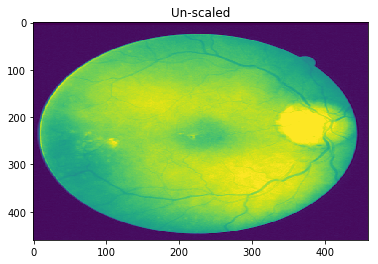

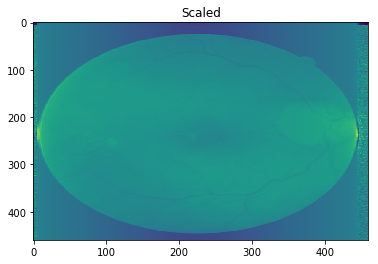

In [13]:
for i in range(7,8):
    plt.imshow(X_test[i,...,0], aspect="auto")
    plt.title("Un-scaled")
    plt.show()
    plt.imshow(X_test_std[i,...,], aspect="auto")
    plt.title("Scaled")
    plt.show()

In [14]:
#print(X_test[14])

In [15]:
X_data = X_data.astype(np.float32)
Y_data = Y_data.astype(np.bool)

X_test = X_test.astype(np.float32)
Y_test = Y_test.astype(np.bool)

In [16]:
X_data_std = X_data_std.astype(np.float32)

X_test_std = X_test_std.astype(np.float32)

In [17]:
#######################
# Training parameters #
#######################
training_iters = 3
epochs = 2
dropout = 0.75
display_step = 1

In [18]:
#data_provider = image_util.SimpleDataProvider(X_data_std, Y_data, channels=3, n_class=2)
data_provider = image_util.SimpleDataProvider(X_data_std, Y_data, channels=1, n_class=2)

In [19]:
print(data_provider.channels)
print(data_provider.n_class)

1
2


In [20]:
net = unet.Unet(channels=data_provider.channels, n_class=data_provider.n_class, layers=3, features_root=64)
trainer = unet.Trainer(net, optimizer="adam")

2017-11-23 15:54:19,276 Layers 3, features 64, filter size 3x3, pool size: 2x2


In [21]:
path = trainer.train(data_provider, "./out", training_iters=training_iters, epochs=epochs, dropout=dropout, display_step=display_step)


2017-11-23 15:54:25,859 Removing '/Users/cesare.chung/int/01_CODE_UNET/prediction'
2017-11-23 15:54:25,861 Removing '/Users/cesare.chung/int/01_CODE_UNET/out'
2017-11-23 15:54:25,866 Allocating '/Users/cesare.chung/int/01_CODE_UNET/prediction'
2017-11-23 15:54:25,867 Allocating '/Users/cesare.chung/int/01_CODE_UNET/out'
2017-11-23 15:55:18,697 Verification error= 25.0%, loss= 0.6613
2017-11-23 15:55:23,749 Start optimization
2017-11-23 15:56:06,026 Iter 0, Minibatch Loss= 0.5618, Training Accuracy= 0.7866, Minibatch error= 21.3%
2017-11-23 15:56:44,064 Iter 1, Minibatch Loss= 0.6181, Training Accuracy= 0.7910, Minibatch error= 20.9%
2017-11-23 15:57:20,401 Iter 2, Minibatch Loss= 0.5537, Training Accuracy= 0.7599, Minibatch error= 24.0%
2017-11-23 15:57:20,406 Epoch 0, Average loss: 0.7182, learning rate: 0.0010
2017-11-23 15:58:06,592 Verification error= 25.0%, loss= 0.5636
2017-11-23 15:58:50,560 Iter 3, Minibatch Loss= 0.5546, Training Accuracy= 0.8008, Minibatch error= 19.9%
2017-1

In [22]:
####################
# Testing result   # Scaled
####################

In [23]:
test_generator =image_util.SimpleDataProvider(X_test_std, Y_test, channels=1, n_class=2)

In [24]:
X_test_std, Y_test = test_generator(1)

In [25]:
prediction = net.predict("./out/model.cpkt", X_test_std)

INFO:tensorflow:Restoring parameters from ./out/model.cpkt


2017-11-23 16:04:12,094 Restoring parameters from ./out/model.cpkt
2017-11-23 16:04:12,517 Model restored from file: ./out/model.cpkt


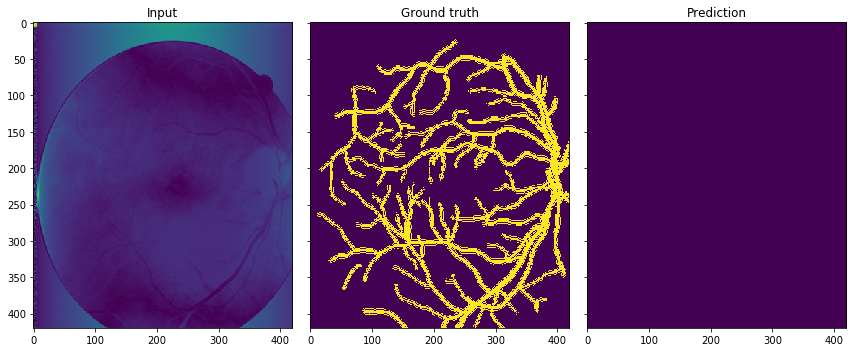

In [26]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(X_test_std[0,...,0], aspect="auto")
ax[1].imshow(Y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()

plt.show()

In [27]:
print("PREDICTION",prediction.shape)

PREDICTION (1, 420, 420, 2)


In [28]:
print("Testing error rate: {:.2f}%".format(unet.error_rate(prediction, util.crop_to_shape(Y_test, prediction.shape))))

Testing error rate: 20.11%


In [29]:
img = util.combine_img_prediction(X_test_std,Y_test,prediction)
util.save_image(img, "/Users/cesare.chung/int/retina_problem_Testing.png")

In [38]:
####################
# Training result  #  Scaled
####################

In [39]:
X_test_std, Y_test = data_provider(1)

prediction = net.predict("./out/model.cpkt", X_test_std)

INFO:tensorflow:Restoring parameters from ./out/model.cpkt


2017-11-23 16:08:21,587 Restoring parameters from ./out/model.cpkt
2017-11-23 16:08:21,955 Model restored from file: ./out/model.cpkt


In [40]:
print("Training error rate: {:.2f}%".format(unet.error_rate(prediction, util.crop_to_shape(Y_test, prediction.shape))))

Training error rate: 21.84%


In [41]:
img = util.combine_img_prediction(X_test_std,Y_test,prediction)
util.save_image(img, "/Users/cesare.chung/int/retina_problem_Training.png")

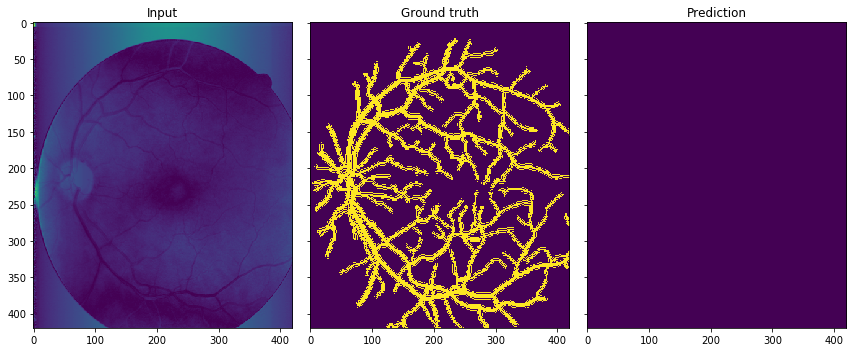

In [42]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(X_test_std[0,...,0], aspect="auto")
ax[1].imshow(Y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()

plt.show()